In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
from minority_report.clean_data import CleanData
from minority_report.scaling import Scaling
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [13]:
df = CleanData()

In [14]:
df.total_clean()

dropping NaNs
Changing date column
Changing suspect column
Changing victim column
Changing premise column
Changing park & metro column
Changing coordinates columns
Changing borough column
Changing patrol column
Changing precinct column


,complaint_id,precinct_number,offense_type,crime_completed,offense_level,premise_desc,premise,jurisdiction,park_name,suspect_age,...,suspect_sex,latitude,longitude,metro,victim_age,victim_race,victim_sex,period,borough,patrol_borough
0,325341655,73,OFFENSES AGAINST PUBLIC ADMINI,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NOT PARK,25-44,...,M,40.664239,-73.908425,NOT SUBWAY,<18,BLACK,M,2015-02-11 15:00:00,BROOKLYN,PATROL BORO BKLYN NORTH
1,393816841,69,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.644590,-73.892672,NOT SUBWAY,45-64,BLACK,F,2012-03-17 10:30:00,BROOKLYN,PATROL BORO BKLYN SOUTH
2,802896158,71,HARRASSMENT 2,COMPLETED,VIOLATION,INSIDE,PUBLIC SCHOOL,N.Y. POLICE DEPT,NOT PARK,<18,...,M,40.658758,-73.942435,NOT SUBWAY,18-24,BLACK,M,2016-10-27 13:48:00,BROOKLYN,PATROL BORO BKLYN SOUTH
3,633812343,112,RAPE,COMPLETED,FELONY,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,M,40.722364,-73.851474,NOT SUBWAY,25-44,WHITE,F,2014-11-27 19:00:00,QUEENS,PATROL BORO QUEENS NORTH
4,300349533,24,GRAND LARCENY,COMPLETED,FELONY,INSIDE,DOCTOR/DENTIST OFFICE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.793465,-73.968950,NOT SUBWAY,45-64,WHITE,F,2013-12-11 13:30:00,MANHATTAN,PATROL BORO MAN NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983202,225471008,109,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,M,40.785050,-73.856852,NOT SUBWAY,25-44,ASIAN / PACIFIC ISLANDER,F,2018-12-02 04:15:00,QUEENS,PATROL BORO QUEENS NORTH
6983203,368441925,25,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,25-44,...,F,40.801717,-73.937283,NOT SUBWAY,25-44,BLACK,M,2018-01-20 00:08:00,MANHATTAN,PATROL BORO MAN NORTH
6983204,146134182,41,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,FELONY,FRONT OF,STREET,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,UNKNOWN,40.814612,-73.903637,NOT SUBWAY,25-44,BLACK HISPANIC,F,2018-08-03 22:30:00,BRONX,PATROL BORO BRONX
6983205,763119484,107,FRAUDS,COMPLETED,MISDEMEANOR,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,NOT PARK,UNKNOWN,...,U,40.724699,-73.808549,NOT SUBWAY,18-24,ASIAN / PACIFIC ISLANDER,M,2018-12-10 11:00:00,QUEENS,PATROL BORO QUEENS SOUTH


In [17]:
df.data.shape

(6416137, 21)

In [20]:
df.data.isnull().sum()

complaint_id       0
precinct_number    0
offense_type       0
crime_completed    0
offense_level      0
premise_desc       0
premise            0
jurisdiction       0
park_name          0
suspect_age        0
suspect_race       0
suspect_sex        0
latitude           0
longitude          0
metro              0
victim_age         0
victim_race        0
victim_sex         0
period             0
borough            0
patrol_borough     0
dtype: int64

# Explore data

In [22]:
df.data.columns

Index(['complaint_id', 'precinct_number', 'offense_type', 'crime_completed',
       'offense_level', 'premise_desc', 'premise', 'jurisdiction', 'park_name',
       'suspect_age', 'suspect_race', 'suspect_sex', 'latitude', 'longitude',
       'metro', 'victim_age', 'victim_race', 'victim_sex', 'period', 'borough',
       'patrol_borough'],
      dtype='object')

<AxesSubplot:xlabel='borough', ylabel='count'>

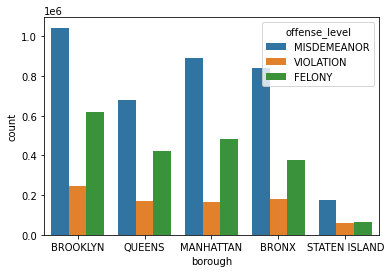

In [42]:
sns.countplot(x='borough', hue='offense_level', data=df.data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 [Text(0, 0, 'OFFENSES AGAINST PUBLIC ADMINI'),
  Text(1, 0, 'ASSAULT 3 & RELATED OFFENSES'),
  Text(2, 0, 'HARRASSMENT 2'),
  Text(3, 0, 'RAPE'),
  Text(4, 0, 'GRAND LARCENY'),
  Text(5, 0, 'PETIT LARCENY'),
  Text(6, 0, 'OFF. AGNST PUB ORD SENSBLTY &'),
  Text(7, 0, 'CRIMINAL TRESPASS'),
  Text(8, 0, 'CRIMINAL MISCHIEF & RELATED OF'),
  Text(9, 0, 'FELONY ASSAULT'),
  Text(10, 0, 'SEX CRIMES'),
  Text(11, 0, 'DANGEROUS DRUGS'),
  Text(12, 0, 'BURGLARY'),
  Text(13, 0, 'DANGEROUS WEAPONS'),
  Text(14, 0, 'THEFT-FRAUD'),
  Text(15, 0, 'ROBBERY'),
  Text(16, 0, 'MISCELLANEOUS PENAL LAW'),
  Text(17, 0, 'GRAND LARCENY OF MOTOR VEHICLE'),
  Text(18, 0, 'INTOXICATED & I

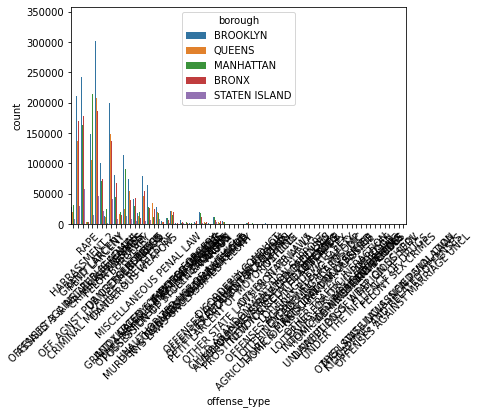

In [54]:
sns.countplot(x='offense_type', hue='borough', data=df.data)
plt.xticks(rotation=45)
